In [42]:
# !pip install
# !pip install fbprophet
# !conda install pandas=0.25.3
# !pip install seaborn
# !pip install matplotlib
# !pip install pystan
# !pip install --upgrade pip setuptools

  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.2.2
    Uninstalling setuptools-68.2.2:
      Successfully uninstalled setuptools-68.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 208.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 67.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 198.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

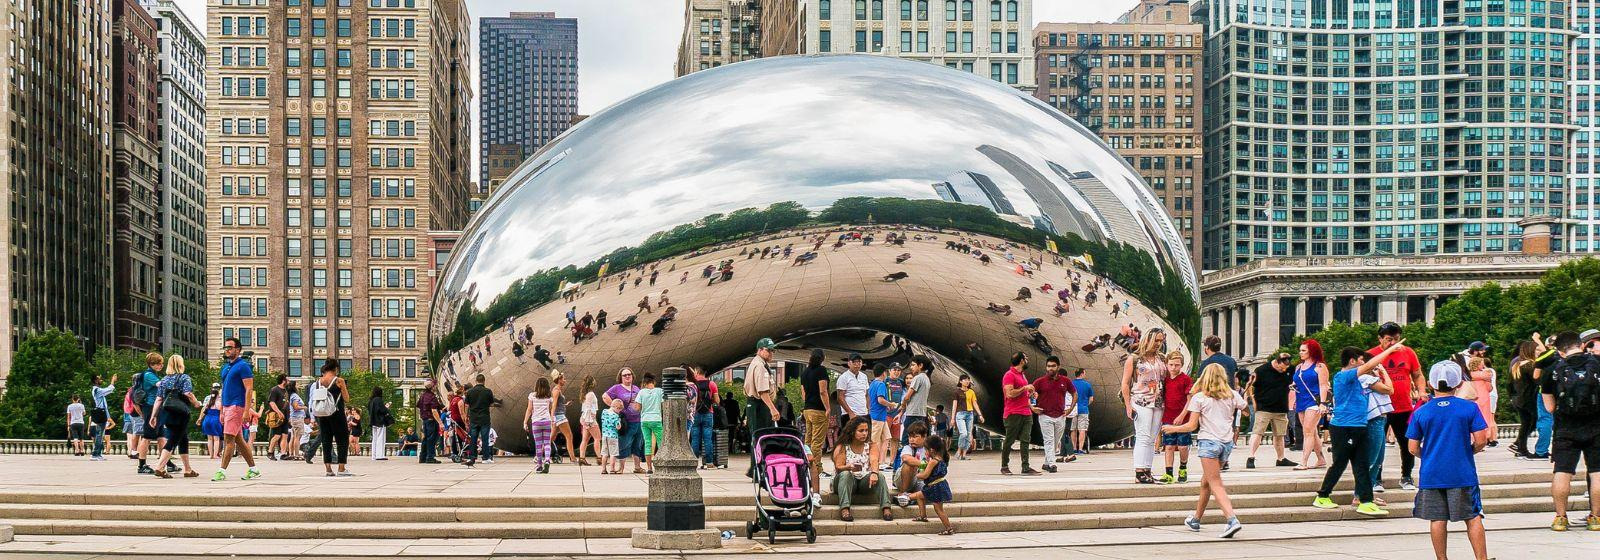

In [28]:
from IPython.display import display
from PIL import Image
path="ChicagoBean.jpg"
display(Image.open(path))

In [74]:
import numpy as np 
import re
import pandas as pd 
import seaborn as sns
from datetime import datetime
import time
from time import sleep
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltd
%matplotlib inline
# plt.style.use('seaborn')
# import fbprophet
# print(fbprophet.__version__)
# from geopy.geocoders import Nominatim
from sklearn.cluster import AgglomerativeClustering as AC

## Import Dataset

In [71]:
# importing crime dataset
crimes = pd.read_csv('Crimes.csv')
# importing zips dataset
zips = pd.read_csv('geonames-postal-code.csv')

In [67]:
print(crimes.shape)

(76429, 30)


In [83]:
crimes.dropna()
crimes = crimes[(crimes['Year'] >= 2011) & (crimes['Year'] <= 2023)]

## Types of Crime

In [84]:
datagb_crime=crimes.groupby("Primary Type")["Primary Type"].count()
datagb_crime.sort_values(ascending=False, inplace=True)
datagb_crime.head(50)

Primary Type
THEFT                                17501
BATTERY                              14709
CRIMINAL DAMAGE                       7702
ASSAULT                               6162
DECEPTIVE PRACTICE                    5148
NARCOTICS                             4620
MOTOR VEHICLE THEFT                   2794
BURGLARY                              2780
ROBBERY                               2256
CRIMINAL TRESPASS                     2110
WEAPONS VIOLATION                     1825
OFFENSE INVOLVING CHILDREN             791
CRIM SEXUAL ASSAULT                    495
PUBLIC PEACE VIOLATION                 482
INTERFERENCE WITH PUBLIC OFFICER       413
SEX OFFENSE                            351
PROSTITUTION                           189
HOMICIDE                               136
ARSON                                  108
STALKING                                76
CONCEALED CARRY LICENSE VIOLATION       58
LIQUOR LAW VIOLATION                    58
INTIMIDATION                            5

In [85]:
crime_list=datagb_crime.index.values[0:25].tolist()
crimes=crimes[crimes["Primary Type"].isin(crime_list)]
crime_list

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'ASSAULT',
 'DECEPTIVE PRACTICE',
 'NARCOTICS',
 'MOTOR VEHICLE THEFT',
 'BURGLARY',
 'ROBBERY',
 'CRIMINAL TRESPASS',
 'WEAPONS VIOLATION',
 'OFFENSE INVOLVING CHILDREN',
 'CRIM SEXUAL ASSAULT',
 'PUBLIC PEACE VIOLATION',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'SEX OFFENSE',
 'PROSTITUTION',
 'HOMICIDE',
 'ARSON',
 'STALKING',
 'CONCEALED CARRY LICENSE VIOLATION',
 'LIQUOR LAW VIOLATION',
 'INTIMIDATION',
 'KIDNAPPING']

In [86]:
crimes=crimes[crimes["Primary Type"]!="OTHER OFFENSE"]
print(crimes['Primary Type'].unique())

['CRIMINAL DAMAGE' 'HOMICIDE' 'THEFT' 'NARCOTICS' 'BATTERY'
 'WEAPONS VIOLATION' 'CRIMINAL TRESPASS' 'ROBBERY' 'ASSAULT'
 'MOTOR VEHICLE THEFT' 'PUBLIC PEACE VIOLATION' 'BURGLARY'
 'DECEPTIVE PRACTICE' 'ARSON' 'INTERFERENCE WITH PUBLIC OFFICER'
 'OFFENSE INVOLVING CHILDREN' 'KIDNAPPING' 'CRIM SEXUAL ASSAULT'
 'CONCEALED CARRY LICENSE VIOLATION' 'INTIMIDATION' 'SEX OFFENSE'
 'LIQUOR LAW VIOLATION' 'PROSTITUTION' 'STALKING']


In [87]:
severe_crime_list=["ARSON", "ASSAULT", "BATTERY", "CRIM SEXUAL ASSAULT", "CRIMINAL DAMAGE", "CRIMINAL TRESPASS", "HOMICIDE", "ROBBERY"]
crimes["severe"]=np.where(crimes['Primary Type'].isin(severe_crime_list), 1, 0)
crimes.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,severe
0,11672899,JC245817,4/29/2019 23:57,096XX S AVENUE N,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,"(41.720422548, -87.538912969)",47.0,21202.0,49.0,528.0,47.0,25.0,19.0,247.0,1
1,11671543,JC244064,4/29/2019 23:45,001XX N HARBOR DR,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE-GARAGE,False,False,...,"(41.885538232, -87.615768415)",22.0,14309.0,38.0,580.0,36.0,42.0,22.0,87.0,1
2,24518,JC243520,4/29/2019 23:40,066XX S LANGLEY AVE,110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,"(41.774183604, -87.608249138)",53.0,22260.0,9.0,332.0,4.0,60.0,18.0,206.0,1
3,11671037,JC243532,4/29/2019 23:40,048XX W HUBBARD ST,820,THEFT,$500 AND UNDER,STREET,False,False,...,"(41.888675607, -87.74687756)",11.0,22216.0,26.0,695.0,45.0,32.0,25.0,81.0,0
5,11670995,JC243531,4/29/2019 23:32,007XX N RIDGEWAY AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False,...,"(41.894273079, -87.719937001)",41.0,21572.0,24.0,584.0,46.0,30.0,16.0,66.0,0


In [79]:
datagb_location=crimes.groupby("Location Description")["Location Description"].count()
datagb_location.sort_values(ascending=False, inplace=True)
datagb_location.head(50)

Location Description
STREET                                                   15285
RESIDENCE                                                10906
APARTMENT                                                10028
SIDEWALK                                                  5153
OTHER                                                     2640
PARKING LOT/GARAGE(NON.RESID.)                            2211
RESTAURANT                                                2137
SMALL RETAIL STORE                                        2050
DEPARTMENT STORE                                          1344
ALLEY                                                     1341
RESIDENCE PORCH/HALLWAY                                   1335
VEHICLE NON-COMMERCIAL                                    1332
SCHOOL, PUBLIC, BUILDING                                  1205
GAS STATION                                               1079
RESIDENTIAL YARD (FRONT/BACK)                             1077
GROCERY FOOD STORE                

In [80]:
crimes["District"]='D'+crimes['District'].astype(str)

In [81]:
#make a dummy variable for district and primary type of crime
dummydf=pd.get_dummies(crimes,columns=["Primary Type","District"])
#we will just make a copy here in case we need to use it in the future
dummydf=dummydf.join(crimes[["District","Primary Type"]])
print(dummydf.shape)
dummydf.head(2)

(70872, 77)


,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,...,District_D25,District_D3,District_D4,District_D5,District_D6,District_D7,District_D8,District_D9,District,Primary Type
0,11672899,JC245817,4/29/2019 23:57,096XX S AVENUE N,1310,TO PROPERTY,APARTMENT,False,False,432,...,False,False,True,False,False,False,False,False,D4,CRIMINAL DAMAGE
1,11671543,JC244064,4/29/2019 23:45,001XX N HARBOR DR,1320,TO VEHICLE,RESIDENCE-GARAGE,False,False,114,...,False,False,False,False,False,False,False,False,D1,CRIMINAL DAMAGE


## Data Exploration / Visualization

In [88]:
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats', 'severe'],
      dtype='object')

In [89]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70872 entries, 0 to 76428
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          70872 non-null  int64  
 1   Case Number                 70872 non-null  object 
 2   Date                        70872 non-null  object 
 3   Block                       70872 non-null  object 
 4   IUCR                        70872 non-null  object 
 5   Primary Type                70872 non-null  object 
 6   Description                 70872 non-null  object 
 7   Location Description        70590 non-null  object 
 8   Arrest                      70872 non-null  bool   
 9   Domestic                    70872 non-null  bool   
 10  Beat                        70872 non-null  int64  
 11  District                    70872 non-null  object 
 12  Ward                        70870 non-null  float64
 13  Community Area              70872 no

In [90]:
# Crimes types in the data

print(crimes['Primary Type'].unique())
print(crimes['Description'].unique())
print(crimes['Location Description'].unique())
print(crimes['Year'].unique())

['CRIMINAL DAMAGE' 'HOMICIDE' 'THEFT' 'NARCOTICS' 'BATTERY'
 'WEAPONS VIOLATION' 'CRIMINAL TRESPASS' 'ROBBERY' 'ASSAULT'
 'MOTOR VEHICLE THEFT' 'PUBLIC PEACE VIOLATION' 'BURGLARY'
 'DECEPTIVE PRACTICE' 'ARSON' 'INTERFERENCE WITH PUBLIC OFFICER'
 'OFFENSE INVOLVING CHILDREN' 'KIDNAPPING' 'CRIM SEXUAL ASSAULT'
 'CONCEALED CARRY LICENSE VIOLATION' 'INTIMIDATION' 'SEX OFFENSE'
 'LIQUOR LAW VIOLATION' 'PROSTITUTION' 'STALKING']
['TO PROPERTY' 'TO VEHICLE' 'FIRST DEGREE MURDER' '$500 AND UNDER'
 'POSS: HEROIN(WHITE)' 'POSS: COCAINE' 'DOMESTIC BATTERY SIMPLE'
 'UNLAWFUL POSS OF HANDGUN' 'TO LAND' 'STRONGARM - NO WEAPON'
 'AGGRAVATED: OTHER DANG WEAPON' 'RETAIL THEFT'
 'AGGRAVATED:KNIFE/CUTTING INSTR' 'ATTEMPT: ARMED-HANDGUN' 'OVER $500'
 'AUTOMOBILE' 'PURSE-SNATCHING' 'MANU/DEL:CANNABIS OVER 10 GMS'
 'AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON' 'SIMPLE' 'AGGRAVATED'
 'POSSESSION OF DRUG EQUIPMENT' 'ARMED: HANDGUN' 'OTHER VIOLATION'
 'ATTEMPT: ARMED-KNIFE/CUT INSTR' 'FROM BUILDING'
 'CYCLE

In [91]:
datagb_crime=crimes.groupby("Primary Type")["Primary Type"].count()
datagb_crime.sort_values(ascending=False, inplace=True)
datagb_crime.head(50)

Primary Type
THEFT                                17501
BATTERY                              14709
CRIMINAL DAMAGE                       7702
ASSAULT                               6162
DECEPTIVE PRACTICE                    5148
NARCOTICS                             4620
MOTOR VEHICLE THEFT                   2794
BURGLARY                              2780
ROBBERY                               2256
CRIMINAL TRESPASS                     2110
WEAPONS VIOLATION                     1825
OFFENSE INVOLVING CHILDREN             791
CRIM SEXUAL ASSAULT                    495
PUBLIC PEACE VIOLATION                 482
INTERFERENCE WITH PUBLIC OFFICER       413
SEX OFFENSE                            351
PROSTITUTION                           189
HOMICIDE                               136
ARSON                                  108
STALKING                                76
CONCEALED CARRY LICENSE VIOLATION       58
LIQUOR LAW VIOLATION                    58
INTIMIDATION                            5

In [92]:
crime_list=datagb_crime.index.values[0:25].tolist()
crimes=crimes[crimes["Primary Type"].isin(crime_list)]
crime_list

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'ASSAULT',
 'DECEPTIVE PRACTICE',
 'NARCOTICS',
 'MOTOR VEHICLE THEFT',
 'BURGLARY',
 'ROBBERY',
 'CRIMINAL TRESPASS',
 'WEAPONS VIOLATION',
 'OFFENSE INVOLVING CHILDREN',
 'CRIM SEXUAL ASSAULT',
 'PUBLIC PEACE VIOLATION',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'SEX OFFENSE',
 'PROSTITUTION',
 'HOMICIDE',
 'ARSON',
 'STALKING',
 'CONCEALED CARRY LICENSE VIOLATION',
 'LIQUOR LAW VIOLATION',
 'INTIMIDATION',
 'KIDNAPPING']

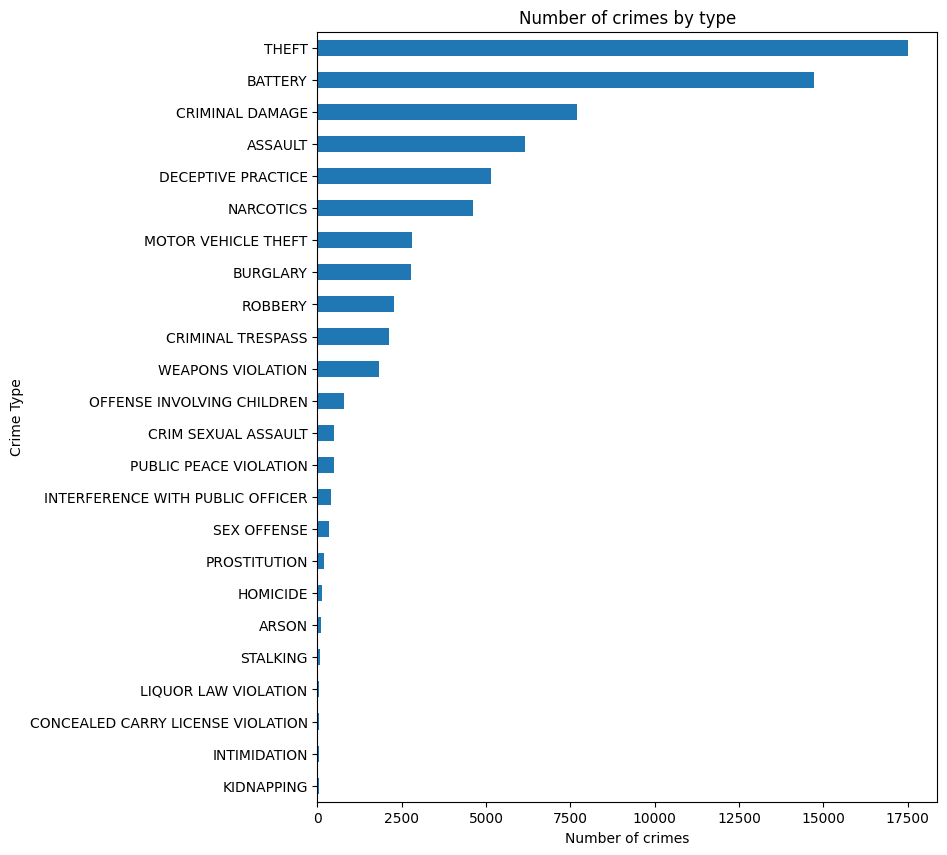

In [93]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [94]:
# Occurrence rates of the various types of crime

crimetypegb=crimes.groupby(["Primary Type"])["Primary Type"].count()/len(crimes)*100
crimetypegb.sort_values(ascending=False, inplace=True)
print(crimetypegb)

Primary Type
THEFT                                24.693814
BATTERY                              20.754318
CRIMINAL DAMAGE                      10.867479
ASSAULT                               8.694548
DECEPTIVE PRACTICE                    7.263800
NARCOTICS                             6.518794
MOTOR VEHICLE THEFT                   3.942319
BURGLARY                              3.922565
ROBBERY                               3.183204
CRIMINAL TRESPASS                     2.977198
WEAPONS VIOLATION                     2.575065
OFFENSE INVOLVING CHILDREN            1.116097
CRIM SEXUAL ASSAULT                   0.698442
PUBLIC PEACE VIOLATION                0.680099
INTERFERENCE WITH PUBLIC OFFICER      0.582741
SEX OFFENSE                           0.495259
PROSTITUTION                          0.266678
HOMICIDE                              0.191895
ARSON                                 0.152387
STALKING                              0.107236
CONCEALED CARRY LICENSE VIOLATION     0.081838


Text(0, 0.5, 'Occurrence rate (%)')

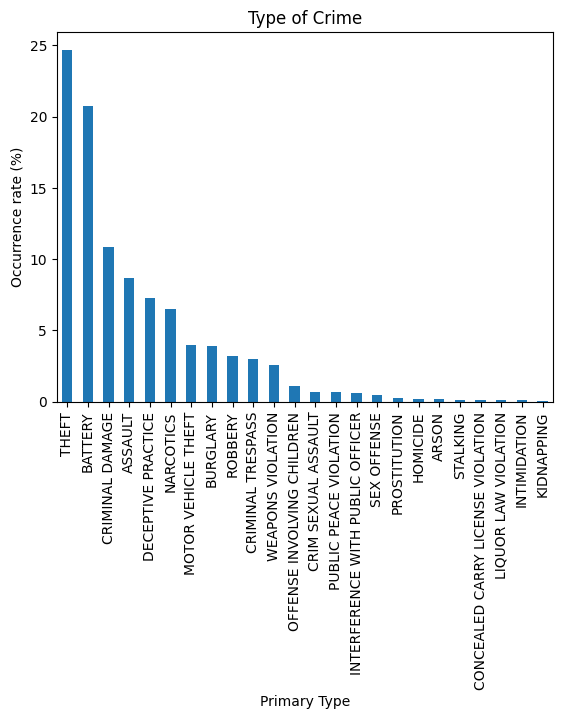

In [95]:
crimetypegb.plot(kind='bar',title="Type of Crime")
plt.ylabel('Occurrence rate (%)')

In [97]:
crimes.head()
print(crimes.columns.values)

['ID' 'Case Number' 'Date' 'Block' 'IUCR' 'Primary Type' 'Description'
 'Location Description' 'Arrest' 'Domestic' 'Beat' 'District' 'Ward'
 'Community Area' 'FBI Code' 'X Coordinate' 'Y Coordinate' 'Year'
 'Updated On' 'Latitude' 'Longitude' 'Location'
 'Historical Wards 2003-2015' 'Zip Codes' 'Community Areas'
 'Census Tracts' 'Wards' 'Boundaries - ZIP Codes' 'Police Districts'
 'Police Beats' 'severe']
